<a href="https://colab.research.google.com/github/OhJin-Soo/code_practice/blob/main/svm_decisiontree_PCA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
dach_length = [55,557,64,63,48,49,54,61]
dach_height = [30,31,36,30,33,25,37,34]
jin_length = [56,47,56,46,49,53,52,48]
jin_height = [52,52,50,53,50,53,49,54]

In [2]:
import numpy as np

d = np.column_stack((dach_length, dach_height))
j  = np.column_stack((jin_length, jin_height))
X = np.concatenate((d,j))
y = [0]*len(d) + [1]*len(j)
print('dogs :', X)
print('labels :', y)

dogs : [[ 55  30]
 [557  31]
 [ 64  36]
 [ 63  30]
 [ 48  33]
 [ 49  25]
 [ 54  37]
 [ 61  34]
 [ 56  52]
 [ 47  52]
 [ 56  50]
 [ 46  53]
 [ 49  50]
 [ 53  53]
 [ 52  49]
 [ 48  54]]
labels : [0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1]


머신러닝 시 중요한점, 데이터는 리스트 형태의 이차원 리스트 형식, 레이블은 데이터의 개수만큼 만들것

In [3]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC

svm = Pipeline([
    ('scaler', StandardScaler()),
    ('linearSVC', LinearSVC(C=1, loss='hinge'))
])
svm.fit(X,y)

Pipeline(steps=[('scaler', StandardScaler()),
                ('linearSVC', LinearSVC(C=1, loss='hinge'))])

In [4]:
dog_classes = {0:'Dashshund', 1:'Jindo dog'}
data1, data2 = [59,35], [53,54]
y_pred = svm.predict([data1])
print('데이터 :',data1, ', 판정 결과:', dog_classes[y_pred[0]])
y_pred = svm.predict([data2])
print('데이터 :',data2, ', 판정결과:', dog_classes[y_pred[0]])

데이터 : [59, 35] , 판정 결과: Dashshund
데이터 : [53, 54] , 판정결과: Jindo dog


In [5]:
import pandas as pd
import numpy as np

data_loc = 'https://github.com/dongupak/DataML/raw/main/csv/'
df = pd.read_csv(data_loc + 'two_classes.csv')
df.tail(3)

,x1,x2,y
997,-4.634470,0.300158,0
998,1.426275,-2.765590,1
999,1.988053,1.466494,1


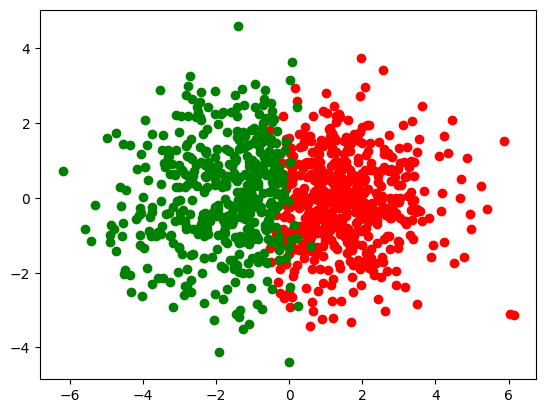

In [6]:
df_positive = df[df['y']==1]
df_nagative = df[df['y']==0]
import matplotlib.pyplot as plt
plt.scatter(df_positive['x1'], df_positive['x2'], color='r')
plt.scatter(df_nagative['x1'], df_nagative['x2'], color = 'g')

In [7]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC

X = df[['x1','x2']].to_numpy()
y = df['y']
svm = Pipeline([
    ('scaler', StandardScaler()),
    ('linearSVC', LinearSVC(C=1, loss='hinge'))
])
svm.fit(X,y)

Pipeline(steps=[('scaler', StandardScaler()),
                ('linearSVC', LinearSVC(C=1, loss='hinge'))])

In [8]:
svm.predict([[0.12,0.56],[-4,40],[0,40],[5,20]])

array([1, 0, 0, 1])

In [9]:
from sklearn.datasets import load_iris

iris = load_iris()
X, y = iris.data, iris.target

In [10]:
from sklearn.tree import DecisionTreeClassifier
dec_tree = DecisionTreeClassifier(max_depth=3)
dec_tree.fit(X,y)

DecisionTreeClassifier(max_depth=3)

In [11]:
from sklearn.tree import export_graphviz

export_graphviz(
    dec_tree,
    out_file=("./dec_tree_for_iris.dot"),
    feature_names=iris.feature_names
)

!ls

dec_tree_for_iris.dot  sample_data


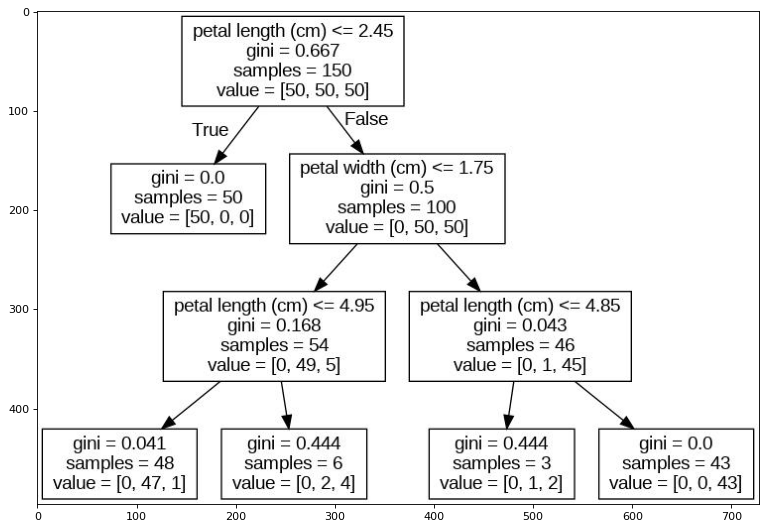

In [13]:
!dot -Tjpg dec_tree_for_iris.dot -o dec_tree_for_iris.jpg

import matplotlib.pyplot as plt
dec_tree_img = plt.imread("./dec_tree_for_iris.jpg")
plt.figure(num=None, figsize=(12,8), dpi = 80,
           facecolor = 'w', edgecolor = 'k')
plt.imshow(dec_tree_img)

In [14]:
import numpy as np
import matplotlib.pyplot as plt

In [15]:
u = np.array([1,1,1]) / np.sqrt(3)
v = np.array([1,0,-1]) / np.sqrt(2)

n_data = 1000
X = []
for _ in range(n_data):
  r_coeff = np.random.randn(2,)
  data = 2.0* r_coeff[0] * u + r_coeff[1] * v + 0.1 * np.random.rand(3,)
  X.append(data)

X = np.array(X)

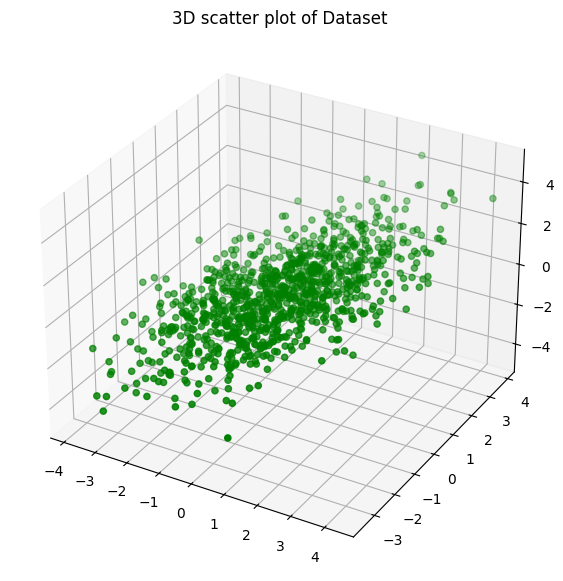

In [17]:
fig = plt.figure(figsize = (10,7))
ax = plt.axes(projection = "3d")
ax.scatter3D(X[:,0], X[:,1], X[:,2], color ="green")
plt.title("3D scatter plot of Dataset")
plt.show()

In [18]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)

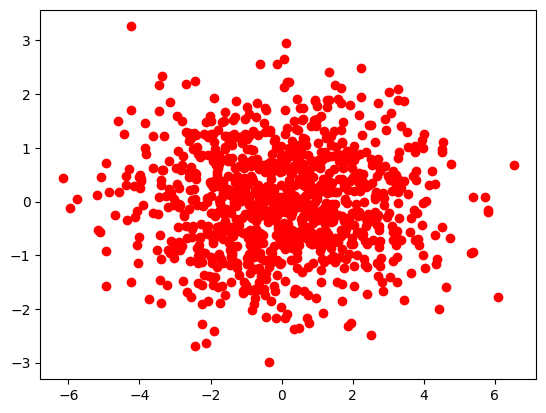

In [19]:
X_2d_sklearn = pca.fit_transform(X)
plt.scatter(X_2d_sklearn[:,0], X_2d_sklearn[:,1], color='r')
plt.show()

In [20]:
iris = load_iris()
df = pd.DataFrame(data = np.c_[iris['data'], iris['target']],
                  columns = iris['feature_names'] + ['target'])
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2.0
146,6.3,2.5,5.0,1.9,2.0
147,6.5,3.0,5.2,2.0,2.0
148,6.2,3.4,5.4,2.3,2.0


In [22]:
from typing import ValuesView
features = iris['feature_names']
x = df.loc[:, features].values
y = df.loc[:,['target']].values
x = StandardScaler().fit_transform(x)

In [23]:
pca = PCA(n_components = 2)
pca_result = pca.fit_transform(x)
principalDf = pd.DataFrame(data = pca_result , columns = ['PC1','PC2'])

In [24]:
finalDf = pd.concat([principalDf, df[['target']]], axis = 1)

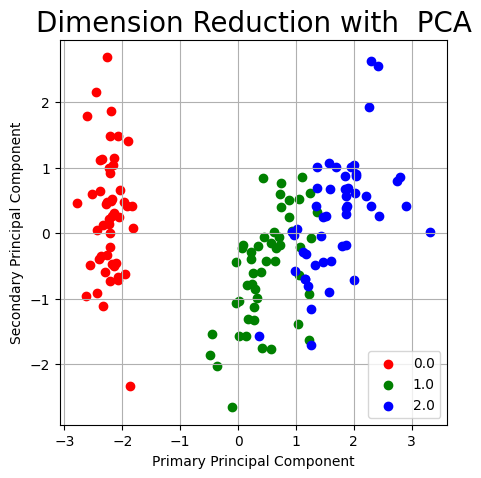

In [25]:
fig = plt.figure(figsize = (5,5))
ax = fig.add_subplot(1,1,1)
ax.set_xlabel('Primary Principal Component')
ax.set_ylabel('Secondary Principal Component')
ax.set_title('Dimension Reduction with  PCA', fontsize = 20)
targets = [0.0, 1.0, 2.0]
colors = ['r','g','b']
for target, color in zip(targets,colors):
  idx = finalDf['target'] == target
  ax.scatter(finalDf.loc[idx, 'PC1'], finalDf.loc[idx, 'PC2'],
             c = color)
ax.legend(targets)
ax.grid()